# 인공신경망(ANN: Artificial Neural Network)

- 입력층 - 은닉층 - 출력층 구성
- 퍼셉트론: 인간의 신경과 같은 개념, 인공신경망의 가장 작은 신경망 단위

##### 퍼셉트론 작동 원리
-

In [1]:
# Keras 데이터 로드 및 훈련, 테스트 분리
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape)

print(test_input.shape, train_target.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


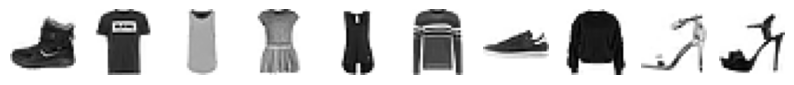

In [2]:
# 10개 훈련 데이터셋 이미지 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [3]:
# 10개 훈련 데이터셋 타겟값 출력
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [4]:
# 타겟값별 데이터 수 출력
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [5]:
# 훈련 데이터 변환 (각 이미지를 1차원으로)
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [8]:
# 로지스틱회귀 대신 확률적경사하강법(SGD) 이용한 로지스틱회귀 분류 모델
## loss='log'는 이진분류시 sigmoid, 다중분류시 Ovr(OvA) 이진분류 반복 후 softmax(10개의 z값)
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)

In [9]:
# 생성된 모델(sc)에 교차 검증(기본 5-fold, 검증 데이터 82% 정확도)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8194166666666666


### 로지스틱회귀 공식(생선 분류)
- 𝑧 = −0.404 × 무게 − 0.576 × 길이 − 0.663 × 대각선 − 0.013 × 높이 − 0.732 × 두께 − 2.161
- z = a*(Weight) + b*(Length) + c*(Diagonal) + d *(Height) + e*(Width) + f

### 패션 MNIST 분류 (a,b,c 대신 w로, 10개 방정식)
- z티셔츠 = w1*(픽셀1) + w2*(픽셀2) + … + w784*(픽셀784) + b
- z바지 = w1’*(픽셀1) + w2’*(픽셀2) + … + w784’*(픽셀784) + b’
---
- softmax 함수를 통과시켜 각 클래스에 대한 확률을 얻을 수 있음
---
인공신경망은 확률적경사하강법을 사용하는 로지스틱회귀와 같음

## 다층 퍼셉트론(MLP) - XOR 문제해결

In [10]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)

# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)

# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)

# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

# x1, x2 값을 번갈아 대입해 가며 최종값 출력
if __name__ == '__main__':
    for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(x[0], x[1])
        print("입력값: " + str(x) + " 출력값: " + str(y))

입력값: (0, 0) 출력값: 0
입력값: (1, 0) 출력값: 1
입력값: (0, 1) 출력값: 1
입력값: (1, 1) 출력값: 0


In [12]:
import sklearn.neural_network
import numpy as np

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = sklearn.neural_network.MLPClassifier(activation='logistic', max_iter=10000, hidden_layer_sizes=(2,))
model.fit(x, y)

print('score:', model.score(x, y))
print('predictions:', model.predict(x))

score: 0.5
predictions: [0 0 0 0]


In [13]:
import sklearn.neural_network
import numpy as np

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = sklearn.neural_network.MLPClassifier(activation='relu', max_iter=10000, hidden_layer_sizes=(2,))
model.fit(x, y)

print('score:', model.score(x, y))
print('predictions:', model.predict(x))

score: 1.0
predictions: [0 1 1 0]


In [14]:
import sklearn.neural_network
import numpy as np

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = sklearn.neural_network.MLPClassifier(activation='logistic', max_iter=10000, hidden_layer_sizes=(2,), solver='lbfgs')
model.fit(x, y)

print('score:', model.score(x, y))
print('predictions:', model.predict(x))

score: 1.0
predictions: [0 1 1 0]


## Keras 신경망 모델 만들기

In [15]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [16]:
# 훈련 데이터셋을 훈련과 검증 데이터셋으로 분리(교차검증은 하지 않음)
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [18]:
### Keras의 신경망 모델은 Sequential() 클래스를 사용
## Sequential()에 매개변수로 완전연결층(fully connected layer) 즉 Dense층 - 입력 층(784), 출력 층(분류 클래스 수, 10)
# 마지막에 활성화 함수로 softmax 사용, 이진분류 activation='sigmoid'

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential([dense])

In [19]:
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim=17, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# compile() - 손실함수(loss), 측정지표(metrics) 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


### 엔트로피(entropy)
: 불확실성(어떤 데이터가 나올지 예측하기 어려운 경우)의 척도
- 엔트로피가 높다는 것은 정보가 많고, 확률이 낮다는 것을 의미

### 크로스 엔트로피(cross entropy)
: 실제 분포 q에 대하여 알지 못하는 상태에서, 모델링을 통하여 구한 분포인 p를 통하여 q를 예측하는 것
- p(x)와 q(x)가 서로 교차해서 곱한다는 의미에서 크로스 엔트로피라고 함
- 머신러닝의 모델은 몇%의 확률로 예측했는데, 실제 확률은 몇%라는 사실을 알고 있을 때 사용
- 실제 값과 예측 값이 맞는 경우에는 0으로 수렴하고 값이 틀릴 경우에는 값이 커지기 때문에, 실제 값과 예측 값의 차이를 줄이기 위한 엔트로피라고 볼 수 있음



```
# fit() - 모델 훈련(epoch 5, loss는 줄어들면서 정확도는 높아짐)
# Keras는 기본적으로 Mini-batch 경사하강법 사용(기본 batch_size=32)
model.fit(train_scaled, train_target, epochs=5)

# evaluate() - 모델 평가(검증 세트의 입력과 타겟값), 85% 정확도
model.evaluate(val_scaled, val_target)

# 로지스틱회귀, 기본 5-fold, 검증 데이터 82% 정확도
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))
```



## 사이킷런-케라스 비교
- Sklearn은 클래스에 가능한 모든 매개 변수를 포함하는 구조
- Keras는 층(layer)을 만드는 부분(원하는 수만큼 여러 층)과 모델을 만드는 부분이 별도로 있는 구조
- 두 가지 모두 훈련 및 평가는 비슷한 구조
---
- Keras에는 일반적인 머신러닝 알고리즘은 없음
- 원하는 작업에 종류에 따라 선택을 해서 사용함
- 필요에 따라서 혼합해서 사용하는 경우도 많음

# 심층 신경망(DNN: Deep Neural Network)
- 입력층과 출력층 사이에 여러 개의 은닉층(hidden layer)
- 은닉층과 출력층에는 활성화 함수(activation function) - 시냅스 역할
- 출력층에는 이진분류 Sigmoid, 다중분류 Softmax 함수
- 은닉층에는 다양한 활성화 함수(비선형함수) 적용 가능(Sigmoid, ReLU, ...)
- 입력층 크기는 데이터의 크기, 출력층은 분류하고 싶은 개수(은닉층?)

In [23]:
# 100개 뉴런 은닉층과 10개 출력층의 신경망 모델 정의
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## summary() 메서드

In [24]:
# 신경망 모델 요약
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 신경망에 layer를 추가하는 3가지 방법
- 100개 뉴런 은닉층과 10개 출력층의 신경망 모델 정의

In [26]:
# Type 1. dense 층 정의 후 Sequential() 클래스에 인자로 전달
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

model = keras.Sequential([dense1, dense2])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
# Type 2. Sequential() 클래스 객체 생성시 매개 변수로 Dense층 직접 삽입
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# Type 3. Sequential() 클래스 객체 생성 후 add() 메소드로 layer 추가 - 가장 많이 사용하는 형식
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 렐루(LeLU) 함수와 Flatten 층
- 은닉층에 활성화 함수 sigmoid 사용
- 선형 출력값(z)이 큰 값이거나 작은 값일 경우 Sigmoid 값의 변화가 작아짐
- 이는 심층 신경망일수록 그 효과가 누적되어 학습을 어렵게 만듦
---
- 이를 개선한 relu 함수는 딥러닝 성공에 핵심 역할을 함
- 아주 단순함. 0보다 크면 z 값을 출력하고, 0보다 작으면 0을 출력
- Flatten()으로 입력층(28x28->784)

In [29]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 설정 및 훈련

In [30]:
# 훈련 데이터 준비(앞과 동일, reshape()를 사용하지 않았음)
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 설정 compile() - 손실함수(loss), 측정지표(metrics) 설정
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련(epochs를 10으로 했을 때?)
model.fit(train_scaled, train_target, epochs=5)

# 모델 검증(epochs를 10으로 했을 때?)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7676 - loss: 0.6660
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8571 - loss: 0.3999
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8715 - loss: 0.3538
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8838 - loss: 0.3254
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8861 - loss: 0.3181
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3794


[0.37762150168418884, 0.8741666674613953]

## 최적화 - 옵티마이저(optimizer)
- Keras는 기본적으로 Mini-batch 경사하강법 사용(기본 batch_size = 32)
- compile() 메소드는 Keras의 기본 경사하강법 알고리즘으로 RMSprop 사용
- Keras는 다양한 종류의 경사하강법 제공, 이를 옵티마이저라고 함


In [31]:
# 옵티마이저 중 기본적인 SGD 사용(mini-batch 사용하는)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# SGD 옵티마이저는 tensorflow.keras.optimizers 아래 SGD 클래스로 구현
# 위의 코드와 다음 코드는 정확하게 동일함
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# SGD 클래스의 매개변수 수정 객체생성, learning rate 설정(기본값 0.01)
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [34]:
# 기본 SGD 클래스에서 파생, momentum, netserrov 매개변수
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

- Adaptive learning rate: 모델이 최적점에 가까이 갈수록 학습률을 낮추어 안정적으로 수렴할 수 있게 함
- 대표적인 옵티마이저: Adagrad, RMSprop

In [35]:
# 적응적 학습률을 사용하는 클래스는 learning rate를 기본값으로 0.001
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
# 모멘텀 최적화와 RMSprop의 장점을 접목한 것이 Adam
# Adam을 적용해 패션 MNIST 모델 훈련
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7642 - loss: 0.6841
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8581 - loss: 0.3937
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8687 - loss: 0.3655
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8821 - loss: 0.3231
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8888 - loss: 0.3019
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3401


[0.34123122692108154, 0.8766666650772095]

# 신경망모델훈련 Best practice

## 손실 곡선

In [37]:
# compile()과 fit()을 통해 모델 설정과 학습을 진행 -> epoch별 출력
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8936 - loss: 0.2930
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8959 - loss: 0.2831
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9013 - loss: 0.2726
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9035 - loss: 0.2645
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9087 - loss: 0.2553


In [ ]:
# 그래프로 출력(fit()메소드 실행 시, history 객체에 저장)
# 패션 MNIST 데이터셋 로드 및 분할
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, text_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [40]:
# fin() 메소드 실행 시, history 객체의 history 속성에 저장
# verbose=0, fit() 하는 과정을 출력하지 않음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


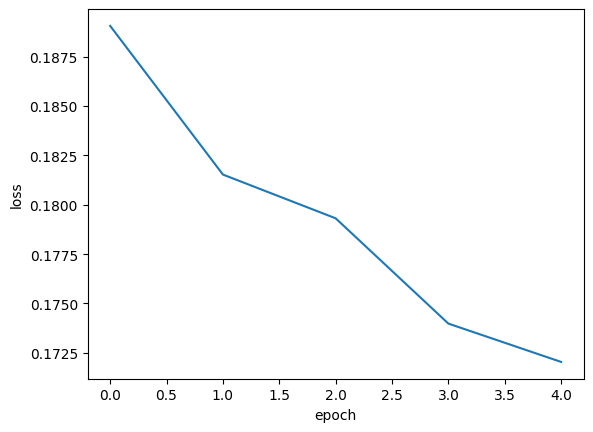

In [41]:
# 그래프로 출력(epoch에 따른 손실값 변화)
# 그래프 저장 plt.savefig('epoch_loss', dpi=300)
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

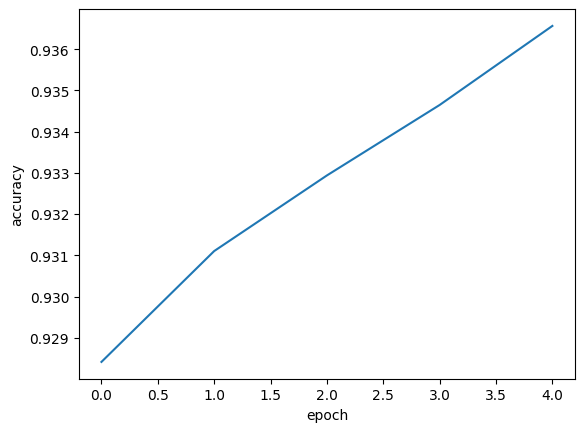

In [42]:
# 그래프로 출력(epoch에 따른 정확도 변화)
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

## 검증 손실(validation loss)

In [43]:
# Epoch를 20으로 늘림(손실이 감소하는 것을 알 수 있음)
# 훈련외에 검증 셋으로 적합한 값 찾기(Overfitting/Underfitting)
# fit()에 validation_data값
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


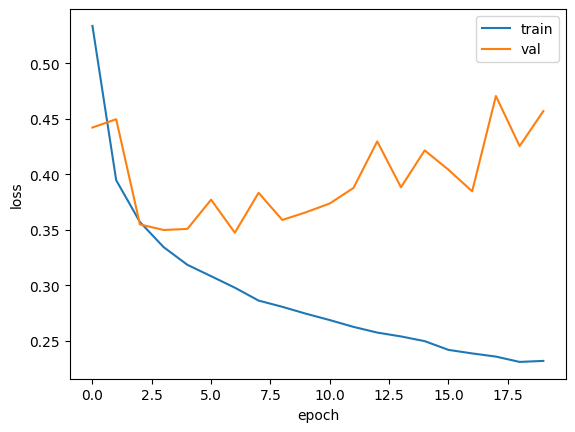

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- 초기에 검증손실이 감소하다가 5번째 epoch만에 다시 상승
- 훈련 손실은 꾸준히 감소하기 때문에 전형적인 Overfitting
- 검증손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


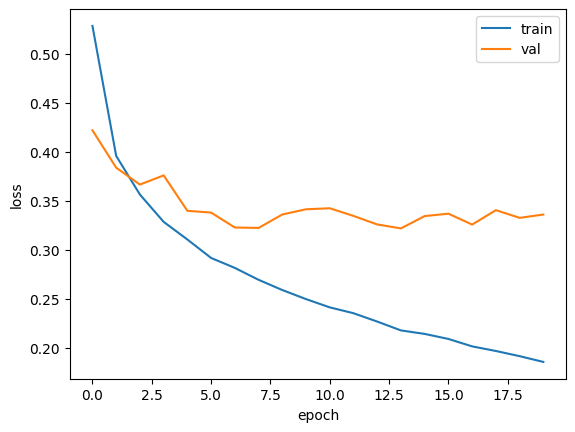

In [46]:
# Overfitting을 막기 위해, Regularization(규제, 일반화) 방식 대신
# 신경망에 알맞은 특화된 방법 drop-out 드롭아웃 사용
# 우선, 옵티마이저 하이퍼파라미터 조정으로 해보겠음
# 기존 RMSprop 옵티마이저 대신에 Adam으로 변경
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

- Overfitting이 훨씬 줄었음
- 10번째 epoch까지 전반적으로 감소 추세
- Adam 옵티마이저가 잘 맞음

## 드롭아웃(Drop out)
- 신경망에서 훈련시 Overfitting을 줄이기 위해 특화된 방법
- 각 샘플을 처리할 때 마다, 은닉층에 있는 뉴런을 랜덤하게 끔(뉴런의 출력을 0으로 만듦)
- 드롭아웃 시킬 노드의 수는 하이퍼파라미터로 지정해 줌

In [47]:
# 100개의 뉴런 중 30% 즉 30개를 랜덤하게 끄면서 학습
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

# 모델 레이어 요약
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

- 평가와 예측에 모델을 사용할 때는 자동으로 Dropout이 적용되지 않음

In [50]:
# 신경망 모델을 중간에 저장 후 추가 학습 or 모델을 배포
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

# 모델 파라미터(가중치, 절편) 저장 save_weights()
# 파일 확장자를 .h5로 하면 HDF5 포맷으로 저장(기본은 checkpoint 포맷)
model.save_weights('model.weights.h5')

# 모델 구조와 파라미터 함께 저장 save()
# 파일 확장자를 .h5로 하면 HDF5 포맷으로 저장(기본은 SavedModel 포맷)
model.save('model.whole.h5')

## 모델 저장과 복원

In [51]:
# 2가지 형태로 모델 저장 테스트
# 1) 훈련을 하지 않은 새로운 모델을 만들고, model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용.
# 2) model-whole.h5 파일에서 새로운 모델을 만들어 바로 사용

# 1번 - 모델 파라미터만 로드
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.load_weights('model.weights.h5')

- 이 모델의 검증 정확도를 확인(predict()는 샘플별 10개 클래스에 대한 확률)
- 정확도계산 - 10개 클래스 확률 중 가장 큰 값을 골라 타깃 레이블과 비교
- argmax()는 배열에서 가장 큰 값의 인덱스(index)를 반환
- axis=-1은 배열의 마지막 차원을 따라 최대값을 고름

In [52]:
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.88375


- 정확도는 compile() 후 evaluate()를 실행해 얻을 수도 있음

In [53]:
# 2번 - 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model = keras.models.load_model('model.whole.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8855 - loss: 0.3249


[0.3283751606941223, 0.8837500214576721]

## 콜백(callback)
- 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
- ModelCheckPoint 콜백은 기본적으로 epoch마다 모델을 저장하며, save_best_only=True로 가장 낮은 검증 점수를 만드는 모델을 저장할 수 있음
- fit() 메소드의 callbacks 매개변수에 리스트로 전달하여 사용
- 최상의 검증 점수를 낸 모델을 best-model.h5 파일에 저장

In [55]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
# 최상의 검증 점수를 낸 모델이 저장되어 있는지 읽어서 예측을 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8915 - loss: 0.3134


[0.31390446424484253, 0.8889166712760925]

## 조기종료(early stopping)
- 최상의 점수를 얻으면 epoch 설정에 상관없이 종료
- 콜백을 2개 선언(ModelCheckPoint(), EarlyStopping())

In [64]:
# EarlyStopping() 매개변수, patience=2는 검증 점수가 향상되지 않더라도 참을 에포크 횟수 지정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

# 콜백을 포함해서 훈련
# (오류남) history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# print(early_stopping_cb.stopped_epoch)